# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Verzha Mahardika
- **Email:** verzhamahardhika@gmail.com
- **ID Dicoding:** verzha_mahardika

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi total pemakaian sepeda pada setiap musim (semi, panas, gugur, dingin) selama satu tahun kalender untuk memahami pola penggunaan yang dominan?
- Pertanyaan 2 : Seberapa besar pengaruh hari kerja dibandingkan hari libur terhadap total pemakaian sepeda dalam kurun waktu satu tahun?
- Pertanyaan 3 : Seberapa kuat korelasi antara suhu (dalam derajat Celsius) dengan total pemakaian sepeda selama 12 bulan terakhir untuk memahami pengaruh kondisi suhu terhadap aktivitas bersepeda?
- Pertanyaan 4 : Bagaimana tren total pemakaian sepeda pada setiap bulan dalam satu tahun terakhir untuk mengidentifikasi pola peningkatan atau penurunan aktivitas bersepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
%matplotlib inline
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
dataset = pd.read_csv('Data/day.csv')

**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
dataset.info()
dataset.describe()
dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Cek Mising Value

In [20]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Berdasarkann hasil diatas dapat artikan bahwa tidak ada data yang missing value pada semua kolom dataset

In [11]:
print("Jumlah Duplikasi: ", dataset.duplicated().sum())
dataset.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Hasil di atas menunjukkan bahwa tidak ada duplikasi pada dataset. Selain itu, ia juga menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik dari dataset.

### Cleaning Data

Menghapus Data jika ada yang duplicate

In [6]:
dataset.drop_duplicates(inplace=True)

Mengganti nama kolom cnt menjadi total_count

In [8]:
dataset.rename(columns={'cnt': 'total_count', 'dteday': 'date'}, inplace=True)

In [13]:
print("Jumlah Duplikasi: ", dataset.duplicated().sum())

Jumlah Duplikasi:  0


Jika Jumlah Duplikasi 0, maka kode di atas akan menghasilkan keluaran yang menunjukkan tidak adanya duplikasi pada dataset

In [14]:
dataset.isna().sum()

instant        0
date           0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
total_count    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
dataset.describe(include='all')

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Jumlah Pengguna Sepeda

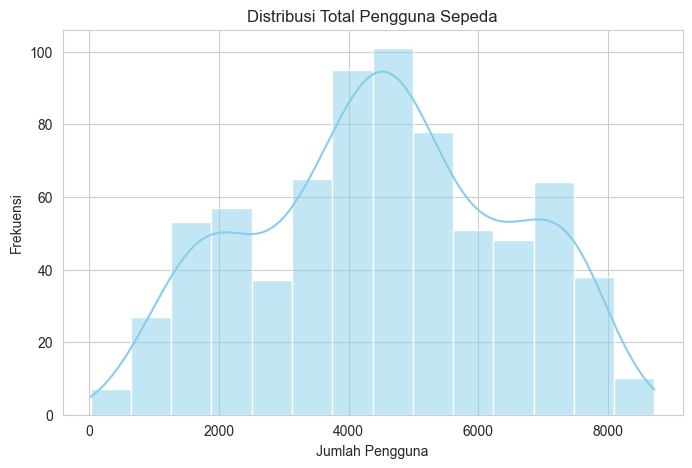

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset['total_count'], kde=True, color='skyblue')
plt.title("Distribusi Total Pengguna Sepeda")
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Frekuensi")
plt.show()

Tren Penggunaan Sepeda Berdasarkan Bulan dan Musim

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4116\1809780049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="mnth", y="total_count", palette="coolwarm")


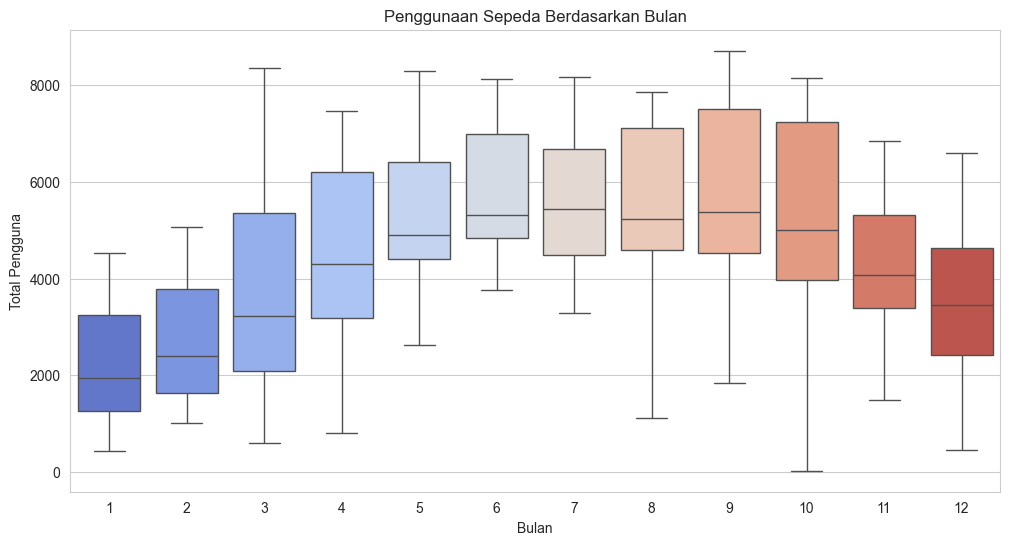

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4116\1809780049.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x="season", y="total_count", palette="viridis")


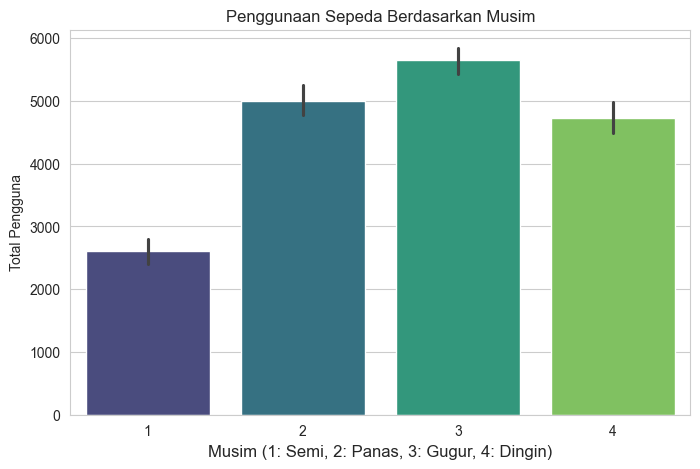

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x="mnth", y="total_count", palette="coolwarm")
plt.title("Penggunaan Sepeda Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Pengguna")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=dataset, x="season", y="total_count", palette="viridis")
plt.title("Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)', fontsize=12)
plt.ylabel("Total Pengguna")
plt.show()

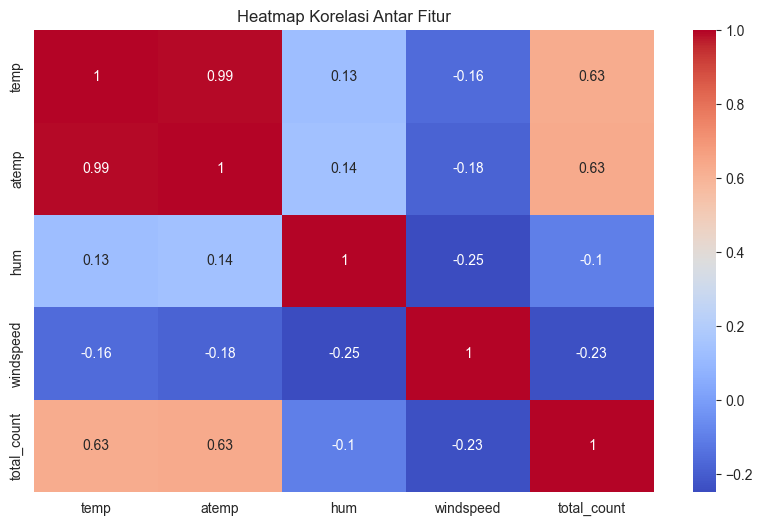

In [22]:
#Pengaruh Cuaca Terhadap Pengguna Sepeda
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[['temp', 'atemp', 'hum', 'windspeed', 'total_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

**Insight**
- Nilai korelasi 0.99 menunjukkan bahwa temp (suhu) dan atemp (suhu yang dirasakan) memiliki korelasi yang sangat kuat dan positif.
Ini mengindikasikan bahwa kedua fitur ini hampir identik, sehingga salah satu bisa dipertimbangkan untuk dihapus jika diperlukan untuk mengurangi multikolinearitas.
- Suhu (temp dan atemp) memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda.

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4116\1581863294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="weekday", y="total_count", palette="rocket")


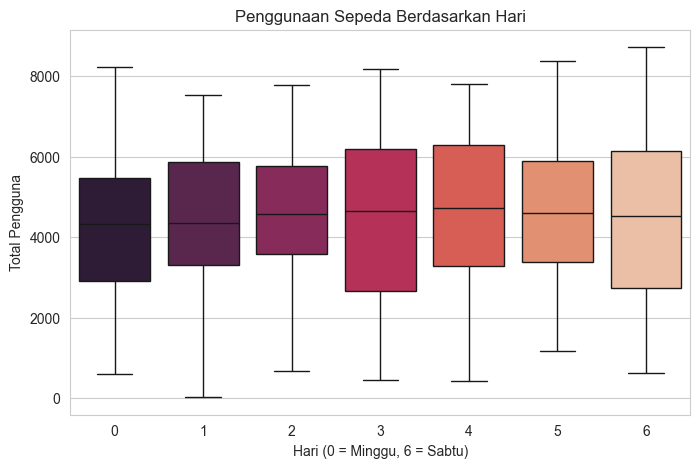

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset, x="weekday", y="total_count", palette="rocket")
plt.title("Penggunaan Sepeda Berdasarkan Hari")
plt.xlabel("Hari (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Total Pengguna")
plt.show()

**Insight:**
- Berdasarkan Hasil visualisasi diatas penggunaan sepeda yaitu pada hari Rabu

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Distribusi Total Pemakaian Sepeda Berdasarkan Musim

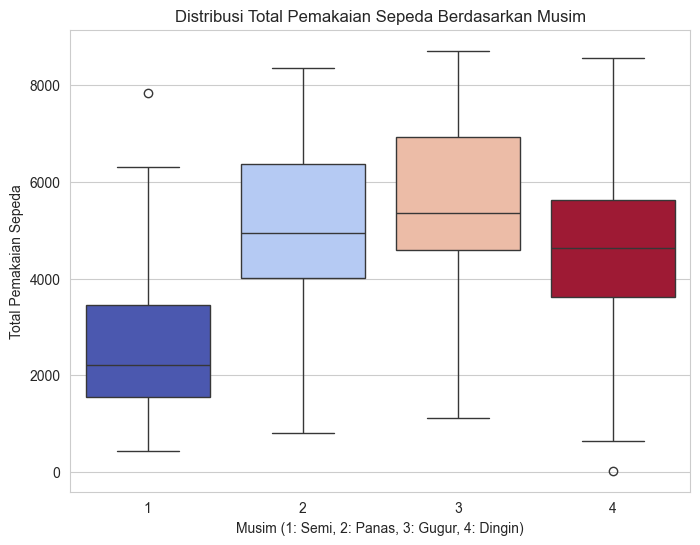

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='total_count', data=dataset, hue='season', palette='coolwarm', legend=False)
plt.title('Distribusi Total Pemakaian Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Total Pemakaian Sepeda')
plt.show()

**Insight**
- Musim panas dan musim gugur memiliki pemakaian sepeda tertinggi, menunjukkan bahwa kondisi cuaca hangat lebih mendukung aktivitas bersepeda.
- Musim semi memiliki pemakaian sepeda paling rendah, kemungkinan disebabkan oleh cuaca yang belum optimal untuk bersepeda.

### Pertanyaan 2: Seberapa besar pengaruh hari kerja dibandingkan hari libur terhadap total pemakaian sepeda dalam kurun waktu satu tahun?

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4116\3599225666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='total_count', data=dataset, palette='Set3')


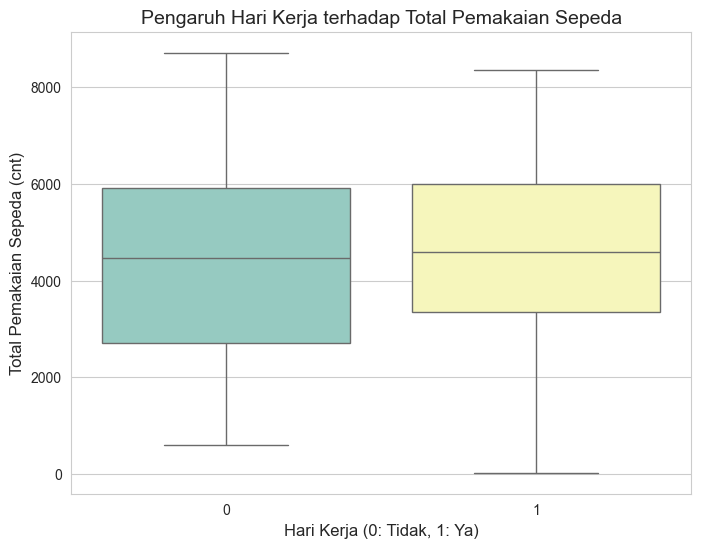

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='total_count', data=dataset, palette='Set3')
plt.title('Pengaruh Hari Kerja terhadap Total Pemakaian Sepeda', fontsize=14)
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)', fontsize=12)
plt.ylabel('Total Pemakaian Sepeda (cnt)', fontsize=12)
plt.show()

**Insight:**
- hari kerja (1: Ya) cenderung memiliki lebih banyak variasi dan pemakaian sepeda yang lebih tinggi dibandingkan dengan hari bukan kerja.

### Pertanyaan 3: Seberapa kuat korelasi antara suhu (dalam derajat Celsius) dengan total pemakaian sepeda selama 12 bulan terakhir untuk memahami pengaruh kondisi suhu terhadap aktivitas bersepeda?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


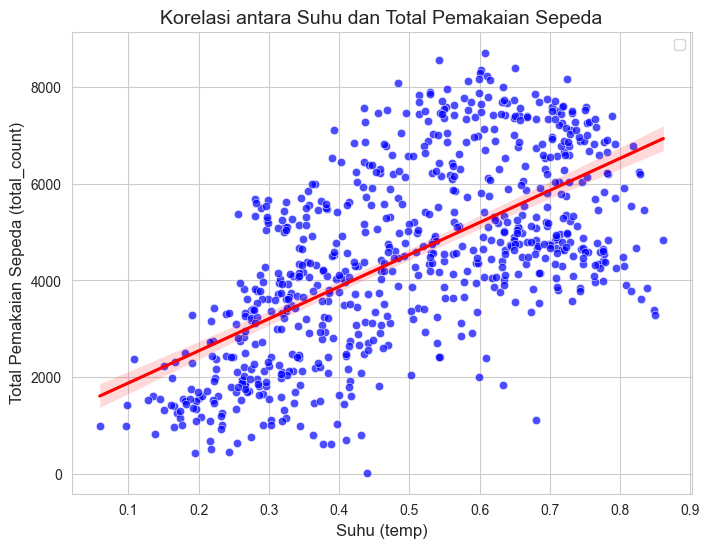

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='total_count', data=dataset, alpha=0.7, color='blue')
sns.regplot(x='temp', y='total_count', data=dataset, scatter=False, color='red', line_kws={'label': 'Trend Line'})
plt.title('Korelasi antara Suhu dan Total Pemakaian Sepeda', fontsize=14)
plt.xlabel('Suhu (temp)', fontsize=12)
plt.ylabel('Total Pemakaian Sepeda (total_count)', fontsize=12)
plt.legend()
plt.show()

**Insight**
- Berdasarkan visualisasi di atas, yang menunjukkan korelasi antara suhu (dalam derajat Celsius) dan total pemakaian sepeda, dapat disimpulkan bahwa terdapat korelasi positif yang kuat antara suhu dan jumlah pemakaian sepeda. Seiring dengan meningkatnya suhu, total pemakaian sepeda juga cenderung meningkat. Hal ini terlihat jelas dari pola titik data yang membentuk garis lurus yang naik, menunjukkan bahwa pemakaian sepeda lebih tinggi pada suhu yang lebih tinggi.

### Pertanyaan 4: Bagaimana tren total pemakaian sepeda pada setiap bulan dalam satu tahun terakhir untuk mengidentifikasi pola peningkatan atau penurunan aktivitas bersepeda?

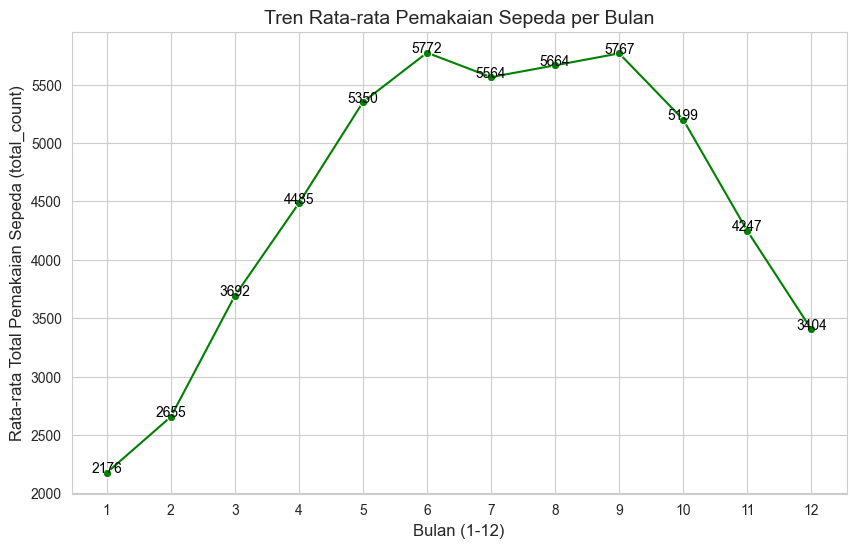

In [32]:
plt.figure(figsize=(10, 6))
monthly_avg = dataset.groupby('mnth')['total_count'].mean().reset_index()
sns.lineplot(x='mnth', y='total_count', data=monthly_avg, marker='o', color='green')
plt.title('Tren Rata-rata Pemakaian Sepeda per Bulan', fontsize=14)
plt.xlabel('Bulan (1-12)', fontsize=12)
plt.ylabel('Rata-rata Total Pemakaian Sepeda (total_count)', fontsize=12)
plt.xticks(range(1, 13))
# Add labels to each point
for i in range(len(monthly_avg)):
    plt.text(monthly_avg['mnth'][i], monthly_avg['total_count'][i], f"{monthly_avg['total_count'][i]:.0f}", 
             color='black', ha='center', fontsize=10)

plt.grid(True)
plt.show()

**Insight**
- Pemakaian sepeda cenderung meningkat mulai dari bulan 1 hingga mencapai puncaknya pada bulan 6, dengan total pemakaian rata-rata tertinggi sebesar 5,767 unit pada bulan 6.
- Setelah bulan 6, tren pemakaian sepeda mengalami penurunan yang cukup tajam. Pada bulan 12, rata-rata pemakaian sepeda berada di titik terendah sebesar 3,404 unit.
- Hal ini menunjukkan bahwa pemakaian sepeda cenderung lebih tinggi selama paruh pertama tahun dan menurun secara signifikan pada paruh kedua tahun, yang bisa dipengaruhi oleh faktor cuaca, musim, atau faktor musiman lainnya.

## Conclusion

- Conclution pertanyaan 1: Pemakaian sepeda paling tinggi terjadi pada musim panas dan musim gugur, ketika kondisi cuaca lebih kondusif.
Pemakaian sepeda menurun signifikan pada musim dingin dan semi, yang kemungkinan dipengaruhi oleh kondisi cuaca yang kurang mendukung.
- Conclution pertanyaan 2: Visualisasi boxplot menunjukkan bahwa pemakaian sepeda lebih tinggi pada hari kerja (1: Ya) dibandingkan dengan hari bukan kerja (0: Tidak). Meskipun ada variasi pada kedua kelompok, secara keseluruhan hari kerja cenderung memiliki lebih banyak pemakaian sepeda.
- Conclution Pertanyaan 3: Menunjukkan adanya korelasi positif yang kuat antara suhu dan total pemakaian sepeda. Semakin tinggi suhu, semakin tinggi pula pemakaian sepeda. Hal ini mengindikasikan bahwa suhu yang lebih hangat mendorong lebih banyak orang untuk bersepeda.
- Conclution Pertanyaan 4: Grafik tren rata-rata pemakaian sepeda per bulan mengungkapkan bahwa pemakaian sepeda cenderung meningkat selama bulan-bulan awal hingga mencapai puncaknya pada bulan 6. Setelah itu, pemakaian sepeda mengalami penurunan tajam hingga bulan 12, yang menunjukkan fluktuasi musiman dalam aktivitas bersepeda.